In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignoring warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

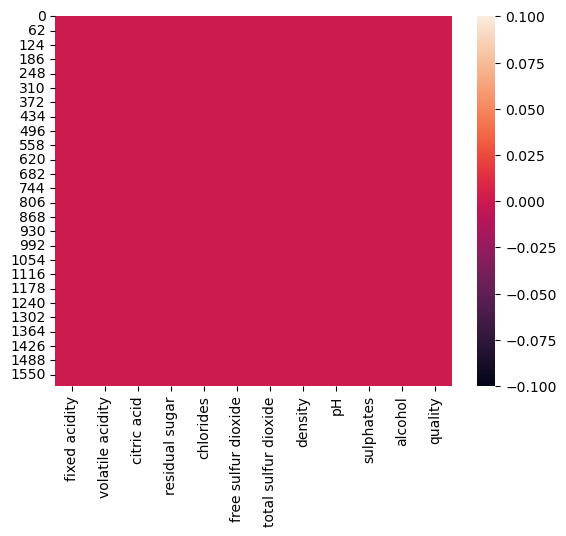

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
df['quality'].nunique()

6

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [17]:
df.shape[0]

1599

In [18]:
df.loc[df["quality"]== " "]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [19]:
df['quality']=df["quality"].replace(" ",np.nan)

In [20]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df['quality']=df['quality'].astype(float)

In [23]:
df['quality'].dtype

dtype('float64')

In [24]:
df.iloc[488,:]

fixed acidity           11.6000
volatile acidity         0.3200
citric acid              0.5500
residual sugar           2.8000
chlorides                0.0810
free sulfur dioxide     35.0000
total sulfur dioxide    67.0000
density                  1.0002
pH                       3.3200
sulphates                0.9200
alcohol                 10.8000
quality                  7.0000
Name: 488, dtype: float64

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


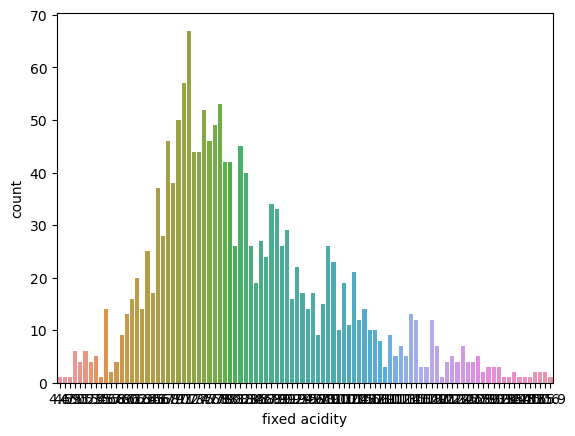

In [25]:
print(df['fixed acidity'].value_counts())
ax = sns.countplot(x='fixed acidity',data=df)
plt.show()

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


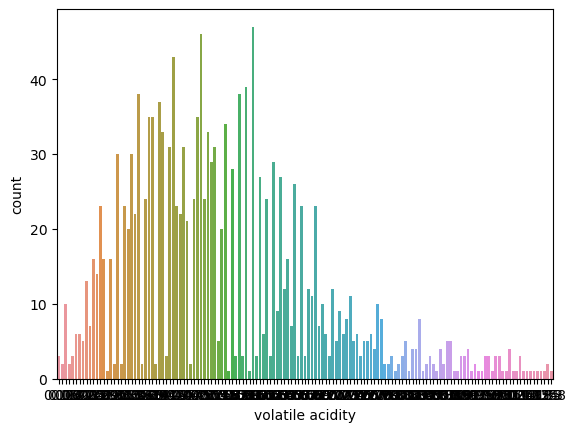

In [26]:
print(df['volatile acidity'].value_counts())
ax = sns.countplot(x='volatile acidity',data=df)
plt.show()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


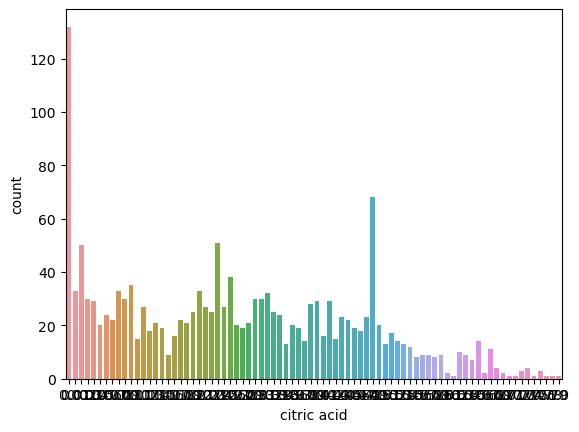

In [27]:
print(df['citric acid'].value_counts())
ax = sns.countplot(x='citric acid',data=df)
plt.show()

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


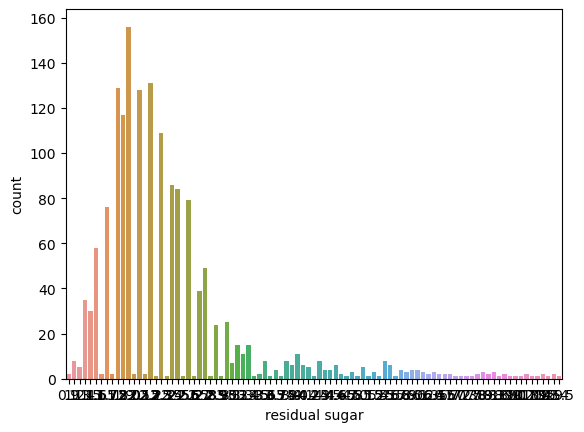

In [28]:
print(df['residual sugar'].value_counts())
ax = sns.countplot(x='residual sugar',data=df)
plt.show()

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


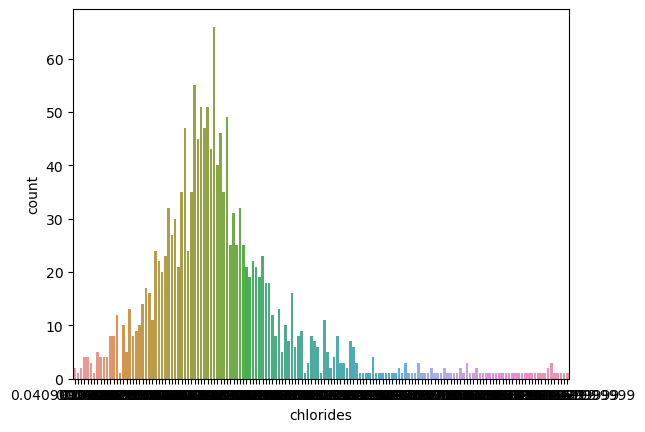

In [29]:
print(df['chlorides'].value_counts())
ax = sns.countplot(x='chlorides',data=df)
plt.show()

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64


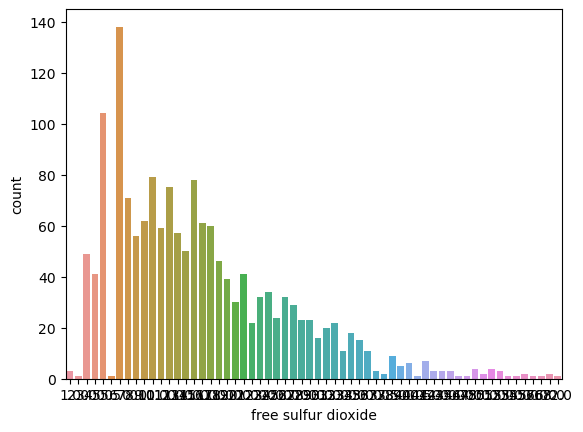

In [30]:
print(df['free sulfur dioxide'].value_counts())
ax = sns.countplot(x='free sulfur dioxide',data=df)
plt.show()

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64


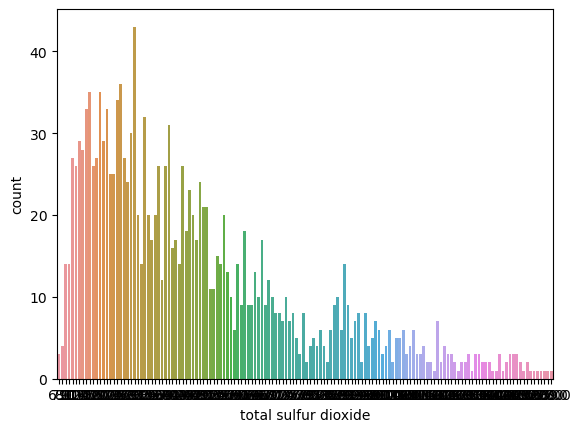

In [31]:
print(df['total sulfur dioxide'].value_counts())
ax = sns.countplot(x='total sulfur dioxide',data=df)
plt.show()

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64


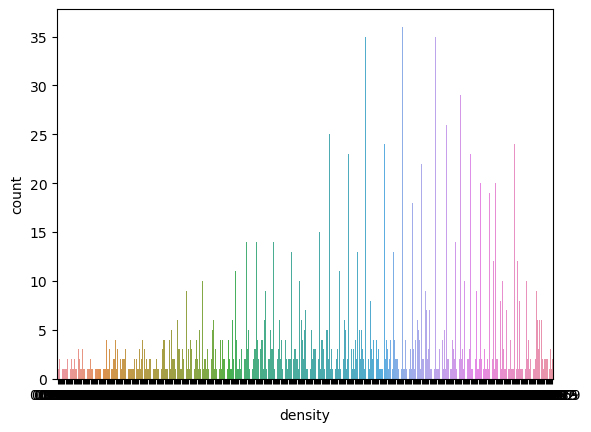

In [32]:
print(df['density'].value_counts())
ax = sns.countplot(x='density',data=df)
plt.show()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64


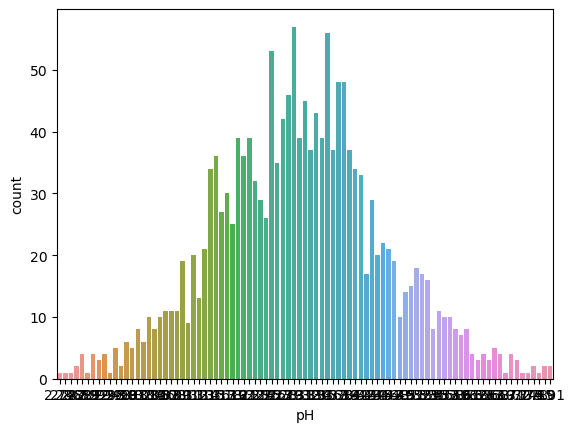

In [33]:
print(df['pH'].value_counts())
ax = sns.countplot(x='pH',data=df)
plt.show()

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64


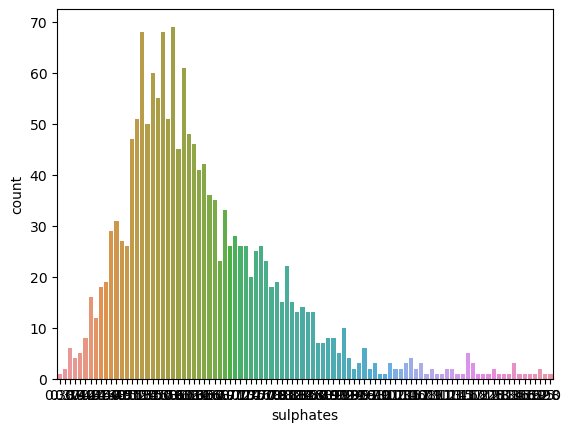

In [34]:
print(df['sulphates'].value_counts())
ax = sns.countplot(x='sulphates',data=df)
plt.show()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


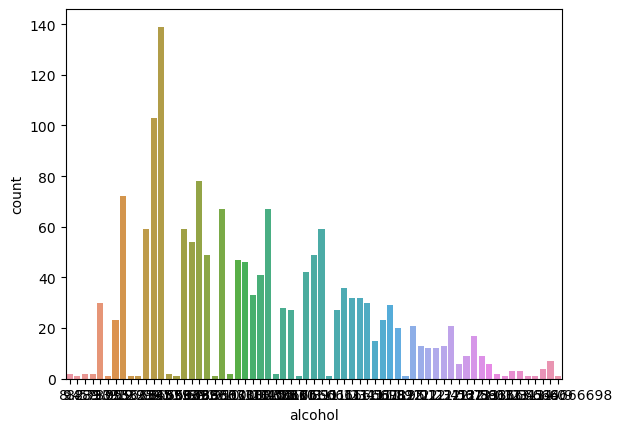

In [35]:
print(df['alcohol'].value_counts())
ax = sns.countplot(x='alcohol',data=df)
plt.show()

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64


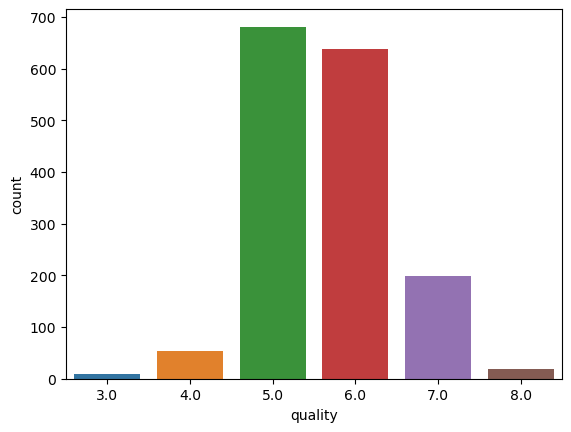

In [36]:
print(df['quality'].value_counts())
ax = sns.countplot(x='quality',data=df)
plt.show()

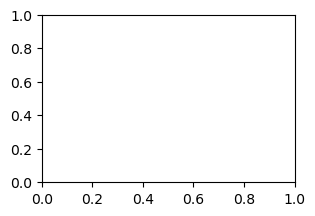

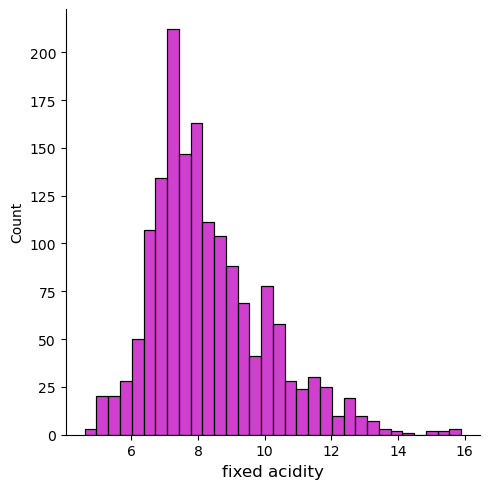

In [37]:
plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1
for col, value in df.items():
    if plotnumber <=1:
        ax=plt.subplot(4,4,plotnumber)
        sns.displot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

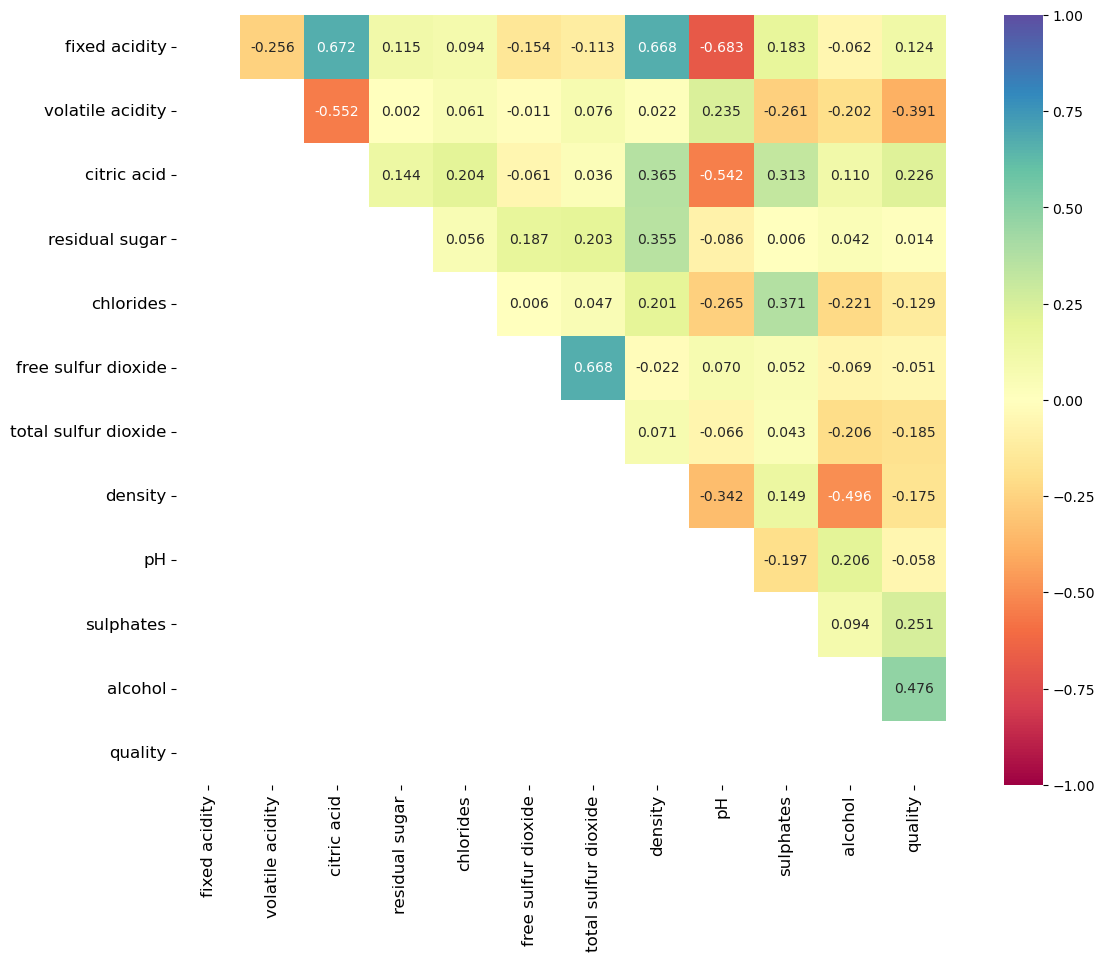

In [38]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

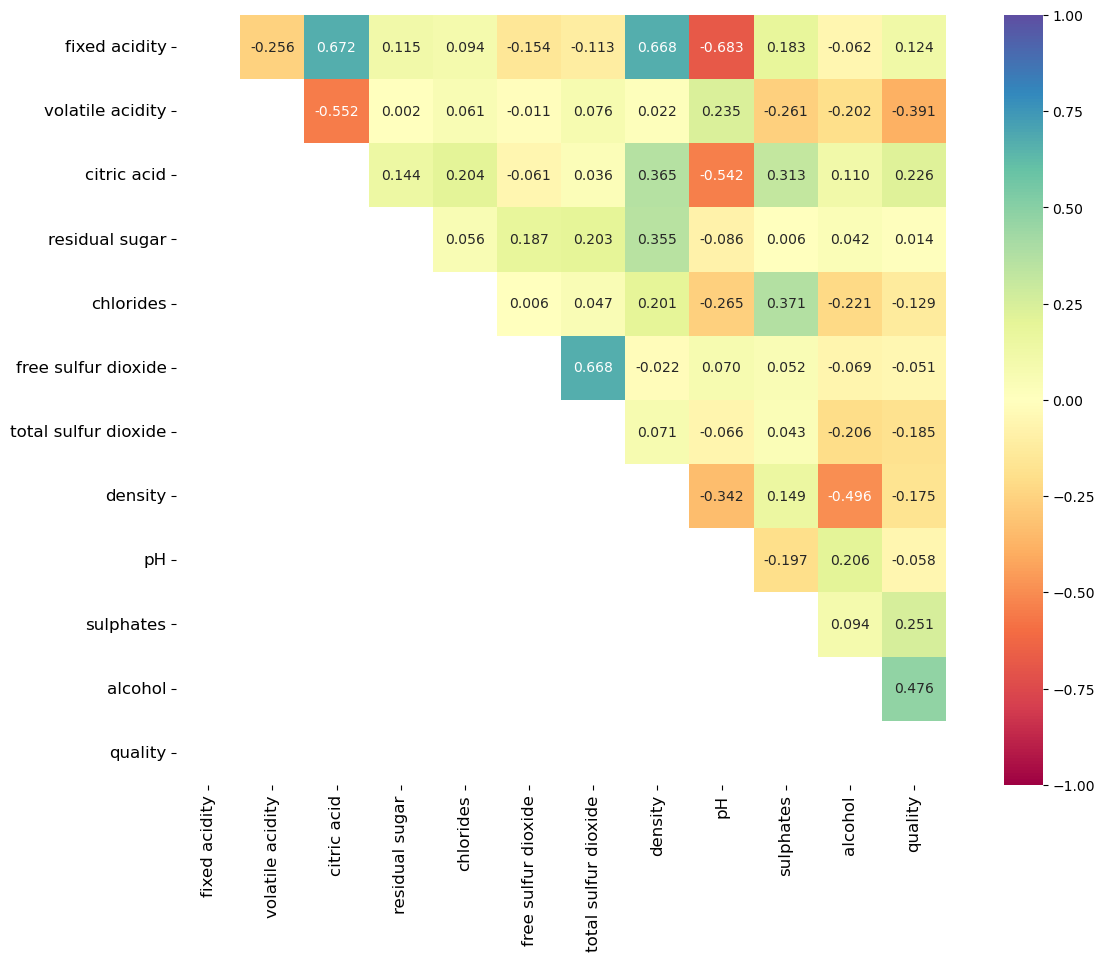

In [39]:
lt = np.tril(df.corr())
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size': 10},cmap="Spectral",mask=lt)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [40]:
df=df.drop('free sulfur dioxide',axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5.0


In [41]:
df.shape

(1599, 11)

In [42]:
df['quality'] = np.where(df['quality'] >= 7, 1, 0)

In [43]:
x = df.drop('quality', axis=1)
y = df['quality']

In [44]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [45]:
sample = SMOTE()
x, y = sample.fit_resample(x, y) 

In [46]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [47]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2759    1
2760    1
2761    1
2762    1
2763    1
Name: quality, Length: 2764, dtype: int32

In [48]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
2759,8.075210,0.317248,0.428992,2.727521,0.105376,16.724790,0.996995,3.324496,0.782752,11.220168
2760,7.196851,0.380315,0.310157,2.025190,0.056079,29.000000,0.994711,3.230787,0.755749,11.300000
2761,11.026792,0.482519,0.588214,3.050717,0.102386,21.582139,0.999549,3.222392,0.781786,11.617861
2762,11.600000,0.410000,0.540000,1.500000,0.095000,41.000000,0.997350,3.020000,0.760000,9.900000


In [49]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
2759,8.075210,0.317248,0.428992,2.727521,0.105376,16.724790,0.996995,3.324496,0.782752,11.220168
2760,7.196851,0.380315,0.310157,2.025190,0.056079,29.000000,0.994711,3.230787,0.755749,11.300000
2761,11.026792,0.482519,0.588214,3.050717,0.102386,21.582139,0.999549,3.222392,0.781786,11.617861
2762,11.600000,0.410000,0.540000,1.500000,0.095000,41.000000,0.997350,3.020000,0.760000,9.900000


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [51]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=21)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = (accuracy_score(y_test,pred))*100
    print("Accuracy Score is : ", accuracy)
    class_report = classification_report(y_test, pred)
    print("\nClassification Report is: \n", class_report)
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    result = accuracy - cv_score
    print("\nAccuracy score - Cross Validation is ", result)

In [52]:
model = LogisticRegression()
classify(model, x, y)

Accuracy Score is :  79.56600361663652

Classification Report is: 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       268
           1       0.78      0.84      0.81       285

    accuracy                           0.80       553
   macro avg       0.80      0.79      0.79       553
weighted avg       0.80      0.80      0.80       553


Accuracy score - Cross Validation is  -0.06558429645936315


In [53]:
model = SVC(C=1.0, kernel = 'rbf', gamma= 'auto', random_state = 42)
classify(model, x, y)

Accuracy Score is :  85.71428571428571

Classification Report is: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       268
           1       0.82      0.92      0.87       285

    accuracy                           0.86       553
   macro avg       0.86      0.86      0.86       553
weighted avg       0.86      0.86      0.86       553


Accuracy score - Cross Validation is  0.04088371727335982


In [54]:
model  = DecisionTreeClassifier(random_state=21, max_depth= 15)
classify(model, x, y)

Accuracy Score is :  88.06509945750453

Classification Report is: 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       268
           1       0.86      0.92      0.89       285

    accuracy                           0.88       553
   macro avg       0.88      0.88      0.88       553
weighted avg       0.88      0.88      0.88       553


Accuracy score - Cross Validation is  1.0173755798412003


In [55]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, x, y)

Accuracy Score is :  93.67088607594937

Classification Report is: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       268
           1       0.91      0.98      0.94       285

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553


Accuracy score - Cross Validation is  3.7291977880860543


In [56]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, x, y)

Accuracy Score is :  76.85352622061484

Classification Report is: 
               precision    recall  f1-score   support

           0       0.87      0.61      0.72       268
           1       0.72      0.92      0.80       285

    accuracy                           0.77       553
   macro avg       0.79      0.76      0.76       553
weighted avg       0.79      0.77      0.76       553


Accuracy score - Cross Validation is  -3.39216919569148


In [57]:
model=ExtraTreesClassifier()
classify(model, x, y)

Accuracy Score is :  94.39421338155516

Classification Report is: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       268
           1       0.93      0.97      0.95       285

    accuracy                           0.94       553
   macro avg       0.95      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553


Accuracy score - Cross Validation is  3.547383180019395


In [58]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, x, y)

Accuracy Score is :  92.76672694394213

Classification Report is: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       268
           1       0.91      0.96      0.93       285

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553


Accuracy score - Cross Validation is  2.462654296721425


In [59]:
model=lgb.LGBMClassifier()
classify(model, x, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1097, number of negative: 1114
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2544
[LightGBM] [Info] Number of data points in the train set: 2211, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496156 -> initscore=-0.015378
[LightGBM] [Info] Start training from score -0.015378
Accuracy Score is :  93.49005424954791

Classification Report is: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       268
           1       0.91      0.97      0.94       285

    accuracy                           0.93       553
   macro avg       0.94      0.93      0.93       553
weighted avg       0.94      0.93      0.93       553

[LightGBM] [Warning] Found whit

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [75]:
FM = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability= True, random_state=21, shrinking=True, verbose=True)
Classifier = FM.fit(x_train, y_train)
fmod_pred = FM.predict(x_test)
fmod_acc = (accuracy_score(y_test,fmod_pred))*100
print("Accuracy score for the best model is: ",fmod_acc)

[LibSVM]Accuracy score for the best model is:  70.16274864376129


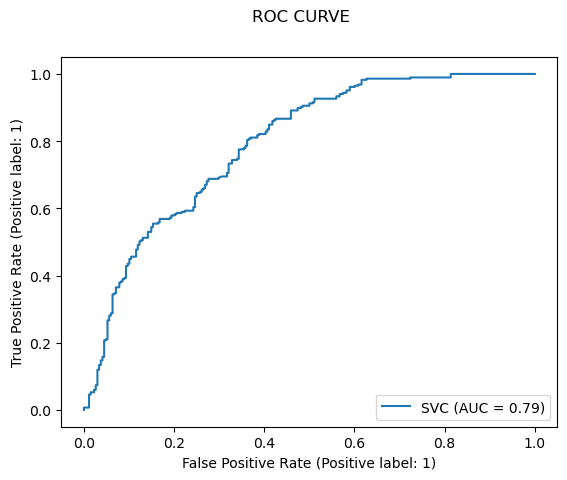

In [76]:
disp = metrics.plot_roc_curve(FM, x_test, y_test)
disp.figure_.suptitle("ROC CURVE")
plt.show()

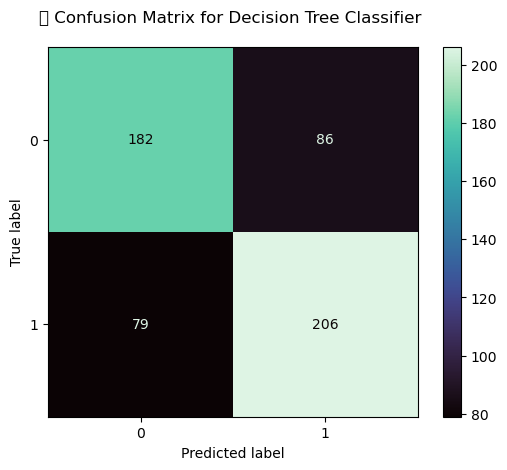

In [77]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()